1. Carregando e processando os dados...
   Dados prontos! Treino: (227845, 29) | Teste: (56962, 29)

2. Treinando modelos
   -> Treinando Regressão Logística...
   -> Treinando Random Forest...

3. Gerando resultados...
--- RESULTADOS: Regressão Logística ---
ROC AUC: 0.9714
PR AUC (Métrica Principal): 0.7156
------------------------------
--- RESULTADOS: Random Forest ---
ROC AUC: 0.9580
PR AUC (Métrica Principal): 0.8485
------------------------------


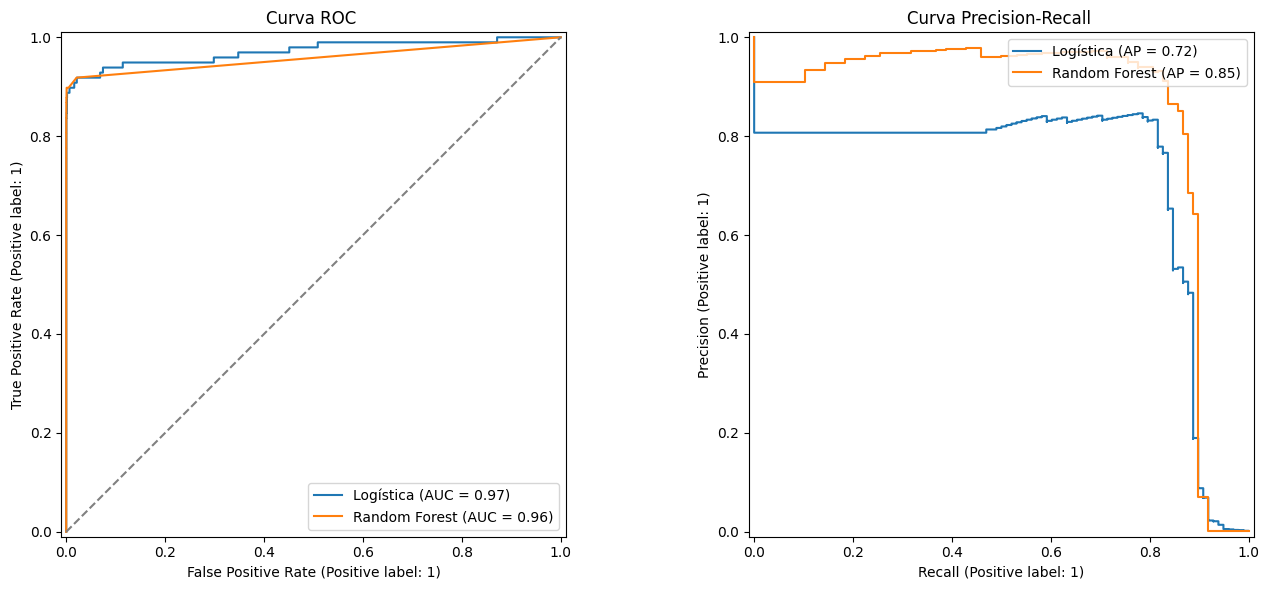

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, average_precision_score, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

print("1. Carregando e processando os dados...")

df = pd.read_csv('/creditcard.csv')

# normaliznd a coluna amount
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

# removendo coluna time
df = df.drop(['Time'], axis=1)

# Separar X (dados) e y (alvo)
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print(f"   Dados prontos! Treino: {X_train.shape} | Teste: {X_test.shape}")

#treinamento dos modelos
print("\n2. Treinando modelos")

# Baseline: Regressão Logística
print("   -> Treinando Regressão Logística...")
model_log = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model_log.fit(X_train, y_train)

# Avançado: Random Forest
print("   -> Treinando Random Forest...")
model_rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, n_jobs=-1, random_state=42)
model_rf.fit(X_train, y_train)

#resultados
print("\n3. Gerando resultados...")

def avaliar_modelo(modelo, nome, X_test, y_test):
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]

    print(f"--- RESULTADOS: {nome} ---")
    print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
    print(f"PR AUC (Métrica Principal): {average_precision_score(y_test, y_proba):.4f}")
    print("-" * 30)
    return y_proba

# Imprimir métricas no console
probs_log = avaliar_modelo(model_log, "Regressão Logística", X_test, y_test)
probs_rf = avaliar_modelo(model_rf, "Random Forest", X_test, y_test)

# graficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Curva ROC
RocCurveDisplay.from_predictions(y_test, probs_log, ax=ax1, name="Logística")
RocCurveDisplay.from_predictions(y_test, probs_rf, ax=ax1, name="Random Forest")
ax1.set_title("Curva ROC ")
ax1.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Gráfico 2: Curva Precision-Recall
PrecisionRecallDisplay.from_predictions(y_test, probs_log, ax=ax2, name="Logística")
PrecisionRecallDisplay.from_predictions(y_test, probs_rf, ax=ax2, name="Random Forest")
ax2.set_title("Curva Precision-Recall ")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()